# CS410: Natural Language Processing, Fall 2023
## A2: Word2Vec and GloVe Embeddings, Dan Jang - 10/23/2023

#### Description of Assignment

##### Introduction
Using the same training & testing datasets from our first assignment, *A1: Sentiment Analysis Text Classification*, in this second assignment - *A2: Word2Vec and GloVe Embeddings*, we will specifically focus on the experimentation of two specific pretrained models: ```word2vec-google-news-300``` and ```glove-wiki-gigaword-300```, which will be downloaded via the [gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models) library.

Specifically, while both the *A1* (previous) & *A2* (current) assignments each implement a text-classification model that predicts sentiment & the same training/testing datasets, in *this assignment*, *A2: Word2Vec and GloVe Embeddings*, we will use **pretrained embeddings** from the ```word2vec``` and ```gloVe``` **models** (*instead of feature-engineering* as from our previous *A1* assignment).

##### Data Preparation
Almost the same from our last assignment, *A1: Sentiment Analysis Text Classification*, we will use a pair of training & testing datasets containing product customer reviews, which is named the "Multilingual Amazon Reviews Corpus", in a ```.json``` container format, with several columns. The assignment will focus on a smaller subset of the original dataset, where we will focus on __two (2) columns__:
1. "review_title" - self-explanatory
2. "stars" - an integer, either 1 or 5, where the former indicates "negative" and 5 indicates "positive."

There will be a training set & a test set.

We will load the dataset using Python & use respective libraries to implement our text-classification model.

Optionally, we will preprocess the data if needed, e.g. case-formating - where in this second assignment, *A2: Word2Vec and GloVe Embeddings*, the instructions state that more effective preprocessing can be achieved if matches such preprocessing that was applied to the aforementioned pretrained models, ```word2vec-google-news-300``` and ```glove-wiki-gigaword-300```.

##### Pretrained Models
Through the [gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models) library, we will experiment with the ```word2vec-google-news-300``` and ```glove-wiki-gigaword-300``` __pretrained models__, focusing on these aspects:
1. __Comparison__ of the two pretrained models.
2. __Visualization__, using tools such as [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for embedding-dimensionality reduction, to visualize & discuss the following related results:
    I. "__emotion words__", e.g. 'happy', 'love', etc., in observing how these emotion words are "*positioned in the vector space*."
    II. "__gender and occupation__", e.g., 'woman', 'queen', 'neuroscientist', etc., to "*explore biases and stereotypes in embeddings*."

##### Text Classification Model
To build our text-classification model, we will __follow these steps__:
1. Any __*one*__ chosen suitable algorithm for text classification.
2. Creating *word representations* of the text data (conversion of text for numerical features).
3. Training of the text-classification model using the training dataset, "sentiment_train.json."
4. Evaluation of our text-classification model using the testing dataset, "sentiment_test.json."

##### Results & Analysis
A detailed analysis of the model's performance by comparing the results from the output of our two algorithms, where we will __include the following__:
1. *F1-score* or other relevant metrics.
2. Any challenges or limitations of the text-classification model/task.

#### Requirements


### Libraries & Constants Initialization

In [2]:
### 0.) Libraries
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#import nltk
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import pandas
import numpy as np
import matplotlib.pyplot as plot
import gensim.downloader

# Loading the pretrained models for le embeddings, using the gensim library!
wordyvec = gensim.downloader.load('word2vec-google-news-300')
glove = gensim.downloader.load('glove-wiki-gigaword-300')

### [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) Visualization of the Word2Vec & GloVe Pretrained Model Embeddings

All words are present in the model!
All words are present in the model!
All words are present in the model!
All words are present in the model!


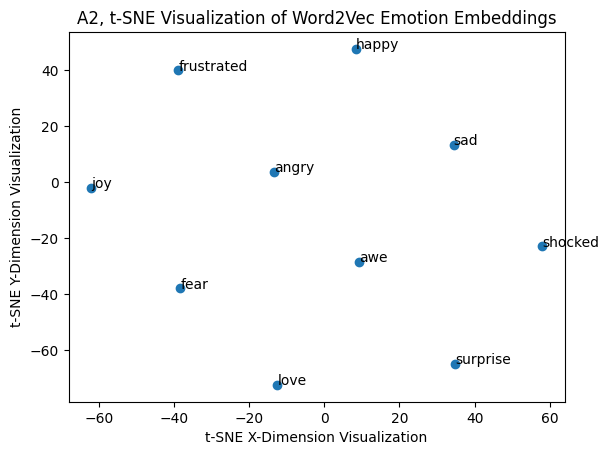

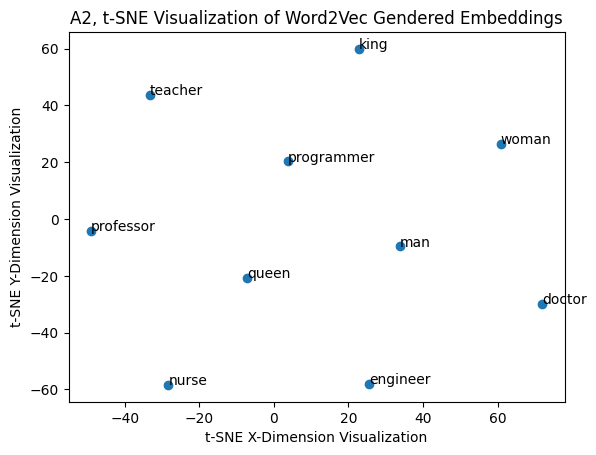

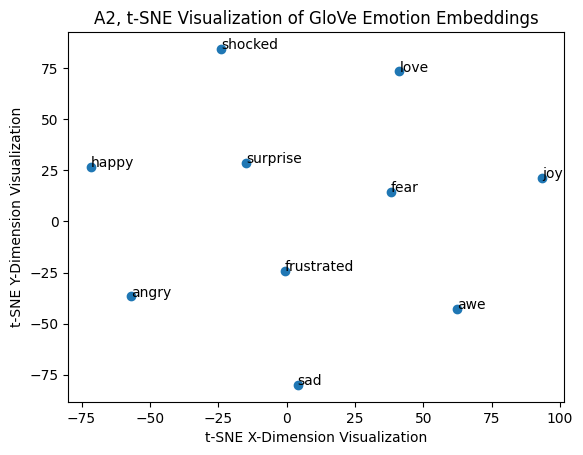

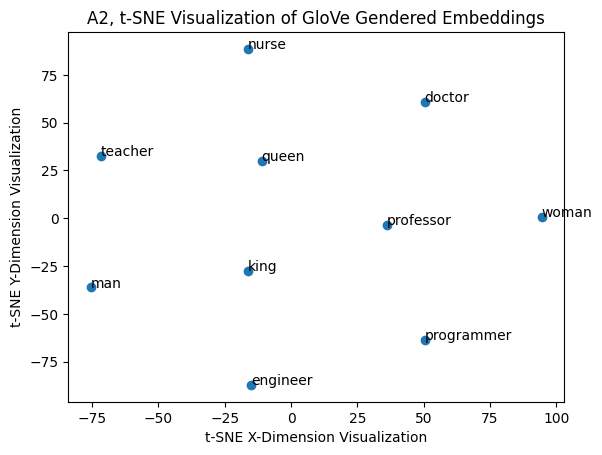

In [3]:
##### CS410: Natural Language Processing, Fall 2023 - 10/23/2023
##### A2: Word2Vec and GloVe Embeddings, Dan Jang - tSNE Visualization Implementation
#### Objective: Exploring Natural Language Processing (NLP), by building a text-classifier
#### for a text classification task, predicting whether a piece of text is "positive" or "negative."
#### ...with the inclusion of two (2) pretrained models, Word2Vec and GloVe, for word embeddings.

## For converting accuracy to percent
percentness = float(100)

## 1.0.) Constants, Variables, & Datasets

# trainfile = str(trainfile)
# testfile = str(testfile)
traindata = []
testdata = []

# 1.0.2.) Embedding Functions
def wordyvec_embedder(words):
    return np.array([wordyvec[word] for word in words])# if w in wordyvec else np.zeros(300))

def glove_embedder(words):
    return np.array([glove[word] for word in words])# if w in glove else np.zeros(300))
# def wordyvec_embedder(words, wordyvec=wordyvec):
#     beds = []
#     for w in words:
#         if w in wordyvec:
#             beds.append(wordyvec[w])
#         else:
#             beds.append(np.zeros(300))
#     return np.array(beds)
#     #return np.array([wordyvec[word] for word in wordlist])# if w in wordyvec else np.zeros(300))

# def glove_embedder(wordlist, glove=glove):
#     beds = []
#     for w in wordlist:
#         if w in glove:
#             beds.append(glove[w])
#         else:
#             beds.append(np.zeros(300))
#     return np.array(beds)
#     #return np.array([glove[word] for word in wordlist])# if w in glove else np.zeros(300))

def plotter(beds, wordlist, name):
    plot.scatter(beds[:,0], beds[:,1])
    plot.title(name)
    plot.xlabel('t-SNE X-Dimension Visualization')
    plot.ylabel('t-SNE Y-Dimension Visualization')
    for idx, w in enumerate(wordlist):
        plot.annotate(w, (beds[idx,0], beds[idx,1]))
    plot.show()
    

### Sanity Debug Data Check Function [Update: Fixed via dependency upgrade for threadpoolctl==3.1.0 or above, as credited below]
#### Super Special Credits to: https://stackoverflow.com/questions/73283082/t-sne-sklearn-attributeerror-nonetype-object-has-no-attribute-split
#### For saving me from hours of frustration & rewriting my code over and over
def verify_model(wordlist, model):
    missingwords = [w for w in wordlist if w not in model]
    if missingwords:
        print('The following words are missing from the model: {}'.format(missingwords))
    else:
        print('All words are present in the model!')

## 1.0.2.1.) Plotting the Word2Vec & GloVe Embeddings for Emotion & Gendered Words as t-SNE Visualizations!
def visualization():
    
    ## 1.0.1.) List of emotion & gendered words for use with tSNE visualization of embeddings
    emotion = ['happy', 'sad', 'angry', 'joy', 'love', 'fear', 'surprise', 'awe', 'frustrated', 'shocked']
    gendered = ['woman', 'man', 'queen', 'king', 'doctor', 'nurse', 'engineer', 'professor', 'teacher', 'programmer']
    
    visualizer = TSNE(n_components=2, random_state=0, perplexity=9)
    
    ### Sanity Debug Check
    verify_model(emotion, wordyvec)
    verify_model(gendered, wordyvec)
    verify_model(emotion, glove)
    verify_model(gendered, glove)

    
    wordyvec_emotionization = visualizer.fit_transform(wordyvec_embedder(emotion))
    wordyvec_genderization = visualizer.fit_transform(wordyvec_embedder(gendered))

    glove_emotionization = visualizer.fit_transform(glove_embedder(emotion))
    glove_genderization = visualizer.fit_transform(glove_embedder(gendered))
    plotter(wordyvec_emotionization, emotion, 'A2, t-SNE Visualization of Word2Vec Emotion Embeddings')
    plotter(wordyvec_genderization, gendered, 'A2, t-SNE Visualization of Word2Vec Gendered Embeddings')
    plotter(glove_emotionization, emotion, 'A2, t-SNE Visualization of GloVe Emotion Embeddings')
    plotter(glove_genderization, gendered, 'A2, t-SNE Visualization of GloVe Gendered Embeddings')
    
visualization()

### Main Implementation: *Text Classification /w Embeddings from Two (2) Pretrained Models*, ```word2vec-google-news-300``` and ```glove-wiki-gigaword-300```.

In [1]:
##### CS410: Natural Language Processing, Fall 2023 - 10/23/2023
##### A2: Word2Vec and GloVe Embeddings, Dan Jang - Main Implementation
#### Objective: Exploring Natural Language Processing (NLP), by building a text-classifier
#### for a text classification task, predicting whether a piece of text is "positive" or "negative."
#### ...with the inclusion of two (2) pretrained models, Word2Vec and GloVe, for word embeddings.

### 1.1.a) Logistic Regression algorithm using sklearn.linear_model.LogisticRegression
### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
### Returns four (4) thingys:
# I.) accuracy_score,
# II.) f1_score,
# III.) confusion_matrix,
# & IV.) classification_report.
def algo_two(xtrain, ytrain, xtest, ytest):
    lreg = LogisticRegression()
    
    lreg.fit(xtrain, ytrain)
    predictionresults = lreg.predict(xtest)
    
    return accuracy_score(ytest, predictionresults), f1_score(ytest, predictionresults), confusion_matrix(ytest, predictionresults), classification_report(ytest, predictionresults)

### 1.2.) NLTK Vader Lexicon-based Sentiment Analysis Classifier
### https://www.nltk.org/_modules/nltk/sentiment/vader.html
## sith_holocron = le sentiment intensity analyzer from NLTK
## theforce = le sentiment score
## aura = le text that is to be analyzed by [darth]vader from NLTK
def darth(aura):
    sith_holocron = SentimentIntensityAnalyzer()
    theforce = sith_holocron.polarity_scores(aura)
    # Debug Statement #2
    #print(theforce['compound'])
    return theforce['compound']

def main(): #trainfile, testfile):
    print("Welcome, this is the main program for A2: Word2Vec and GloVe Embeddings.")
    print("Written by Dan J. for CS410: Natural Language Processing, Fall 2023.")
    print("\nWe will use one (1) classification algorithm:\n& 1. Logistic Regression + two (2) pretrained models for embeddings,\nWord2Vec & GloVe,\n for embeddings\n...to create a text-classifier to guess negative or positive sentimentiality based on various text-reviews of products.")

    # # Loading the pretrained models for le embeddings, using the gensim library!
    # glove = gensim.downloader.load('glove-wiki-gigaword-300')
    # wordyvec = gensim.downloader.load('word2vec-google-news-300')
    
    # ## For converting accuracy to percent
    # percentness = float(100)
    
    # ## 1.0.) Constants, Variables, & Datasets
    
    # # trainfile = str(trainfile)
    # # testfile = str(testfile)
    # traindata = []
    # testdata = []
    
    # ## 1.0.1.) List of emotion & gendered words for use with tSNE visualization of embeddings
    # emotion = ['happy', 'sad', 'angry', 'joy', 'love', 'fear', 'surprise', 'awe', 'frustrated', 'shocked']
    # gendered = ['woman', 'man', 'queen', 'king', 'doctor', 'nurse', 'engineer', 'professor', 'teacher', 'technician', 'programmer']
    
    # 1.0.I.A) Debug Statements #1a for dataset loading times:
    print("Loading the training & testing datasets...")
    # with open(trainfile, "r") as trainfile:
    with open("sentiment_train.json", "r") as trainfile:
        #traindata = json.load(trainfile)
        for row in trainfile:
            traindata.append(json.loads(row))
        
    trainframe = pandas.DataFrame(traindata)
        
    # with open(testfile, "r") as testfile:
    with open("sentiment_test.json", "r") as testfile:
        #testdata = json.load(testfile)
        for row in testfile:
            testdata.append(json.loads(row))
        
    testframe = pandas.DataFrame(testdata)

    # 1.0.I.B) Debug Statements #1b for dataset loading times:
    print("Successfully loaded the training & testing datasets!\n")
    
    ## 1.0.1.) Initial Preprocessing of the training & testing data
    ## First, we isolate our two (2) columns, "review_title" & "stars."
    ## Second, we will convert values in the "stars" column so that 1 [negative] = 0 & 5 [positive] = 1.
    ## This will allow us to make the negative or positive sentiment a binary value-based thingy.
    trainframe = trainframe[['review_title', 'stars']]
    trainframe['stars'] = trainframe['stars'].apply(lambda x: 1 if x == 5 else 0)
    
    testframe = testframe[['review_title', 'stars']]
    testframe['stars'] = testframe['stars'].apply(lambda x: 1 if x == 5 else 0)
    
    ## 1.0.1.) Applying NLTK Vader Sentiment
    ## https://www.nltk.org/_modules/nltk/sentiment/vader.html
    x2train = trainframe
    x2train = x2train[['review_title', 'stars']]
    # Have to truncate the training dataset so that it does not crash my computer, heh.
    # Using a random_state seed of 2005, which was when Star Wars III was released (when Vader was technically introduced in the prequelz).
    #x2train = x2train.sample(n=20000, random_state=2005)
    print("Now applying NLTK Vader sentiment analysis to the training dataset...")
    x2train['nltk_vader_sentiment'] = x2train['review_title'].apply(darth)
    print("...Vader has been applied to the training set.")
    y2train = x2train['stars']
    
    x2test = testframe
    x2test = x2test[['review_title', 'stars']]
    print("Now applying NLTK Vader sentiment analysis to the testing dataset...")
    x2test['nltk_vader_sentiment'] = x2test['review_title'].apply(darth)
    print("...Vader has been applied to the testing set.")
    
    ## 1.1.) Vectorization of the text-reviews in the datasets using sklearn.feature_extraction.text.CountVectorizer.
    ## As a core component of text-classification, the vectorization process of the text-review data is essential for feature engineering in natural language processing.
    ## https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    vectorization_machine_9000 = CountVectorizer()
    xtrain = vectorization_machine_9000.fit_transform(trainframe['review_title'])
    xtrain = xtrain.toarray()
    ytrain = trainframe['stars']
    
    xtest = vectorization_machine_9000.transform(testframe['review_title'])
    xtest = xtest.toarray()
    ytest = testframe['stars']
    
    ## 1.1.1.) Applying NLTK Vader Sentiment to vectorized data
    x2traintext = vectorization_machine_9000.fit_transform(x2train['review_title'])
    x2trainsentiment = x2train['nltk_vader_sentiment'].values.reshape(-1,1)
    parsed_x2traintext = pandas.DataFrame(x2traintext.toarray())
    parsed_x2trainsentiment = pandas.DataFrame(x2trainsentiment)
    
    x2testtext = vectorization_machine_9000.transform(x2test['review_title'])
    x2testsentiment = x2test['nltk_vader_sentiment'].values.reshape(-1,1)
    parsed_x2testtext = pandas.DataFrame(x2testtext.toarray())
    parsed_x2testsentiment = pandas.DataFrame(x2testsentiment)
    
    x2train = pandas.concat([parsed_x2traintext, parsed_x2trainsentiment], axis=1)
    x2test = pandas.concat([parsed_x2testtext, parsed_x2testsentiment], axis=1)
    
    ### 1.0.2a) Run Algorithms & Print the Model Results - without classifiers (with vectorization)
    print("-----\n")
    print("Running algorithms on le training & testing datasets (without classifiers)...")
    print("Running Gaussian Näive Bayes algorithm, version A...")
    algo1accuracy, algo1f1, algo1cmatrix, algo1creport = algo_one(xtrain, ytrain, xtest, ytest)
    print("..First algorithm is done!")
    
    print("Running Logistic Regression algorithm, version A...")
    algo2accuracy, algo2f1, algo2cmatrix, algo2creport = algo_two(xtrain, ytrain, xtest, ytest)
    print("..Second algorithm is done!")
    
    print("...All Done!")
    print("-----\n")
    
    print("Here are le results [Version A ('control'), non-classification]...\n")
    print("Algorithm #1, Version A: Gaussian Näive Bayes Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", algo1accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", algo1f1, ",")
    print("...with a Confusion Matrix: \n", algo1cmatrix, ",")
    print("...& lastly, the classification Report: \n", algo1creport)
    print("-----\n")
    
    print("Algorithm #2, Version A: Logistic Regression Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", algo2accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", algo2f1, ",")
    print("...with a Confusion Matrix: \n", algo2cmatrix, ",")
    print("...& lastly, the classification Report: \n", algo2creport)
    print("-----\n")
    
    ### 1.0.2b) Run Text-Classification Algorithms & Print the Model Results - with NLTK Vader sentiment analysis (& vectorization)
    print("-----\n")
    print("Running algorithms on le training & testing datasets (with NLTK Vader classifier)...")
    
    print("Running Gaussian Näive Bayes algorithm, version B...")
    algo1accuracy, algo1f1, algo1cmatrix, algo1creport = algo_one(x2train, y2train, x2test, ytest)
    print("..First algorithm is done!")
    
    print("Running Logistic Regression algorithm, version B...")
    algo2accuracy, algo2f1, algo2cmatrix, algo2creport = algo_two(x2train, y2train, x2test, ytest)
    print("..Second algorithm is done!")
    
    print("...All Done!")
    print("-----\n")
    
    print("Here are le results [Version B, NLTK Vader sentiment analysis classification]...\n")
    print("Algorithm #1, Version B: Gaussian Näive Bayes Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", algo1accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", algo1f1, ",")
    print("...with a Confusion Matrix: \n", algo1cmatrix, ",")
    print("...& lastly, the classification Report: \n", algo1creport)
    print("-----\n")
    
    print("Algorithm #2, Version B: Logistic Regression Performance, Metrics, & Results:")
    print("...Accuracy was found to be, ", algo2accuracy * percentness, "%,")
    print("...F1 Score was found to be: ", algo2f1, ",")
    print("...with a Confusion Matrix: \n", algo2cmatrix, ",")
    print("...& lastly, the classification Report: \n", algo2creport)
    print("-----\n")

#a1_program = a1_text_classifer("sentiment_train.json", "sentiment_test.json")

#### Commented out codez
# def main():
    
if __name__ == "__main__":
    main()

KeyboardInterrupt: 

### Text-Classification Model Performance Analysis & Discussion

#### Initial Data Results, Metrics, & Analysis

For Version 'A', which served as our vectorized, but non-classified (our 'control' run) iteration, where it ran the Gaussian Näive Bayes & Logistic Regression algorithms on the training & testing datasets - the following results were found at the initial successful attempt:

Gaussian Näive Bayes Results (Version A):

    Accuracy: ~59.2%
    F1 Score: ~0.3665

    Confusion Matrix: 
        [[948  52]
        [764 236]]
    
    Classification Report:
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

    accuracy                            0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg    0.69      0.59      0.53      2000

Logistic Regression Results (Version A):

    Accuracy: ~92.7%
    F1 Score: ~0.92729

    Confusion Matrix: 
        [[923  77]
        [ 69 931]]
    
    Classification Report:
                precision    recall  f1-score   support

            0       0.93      0.92      0.93      1000
            1       0.92      0.93      0.93      1000

    accuracy                            0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg    0.93      0.93      0.93      2000

For Version 'B', like the previous version, both algorithms were ran, but with the NLTK Vader Sentiment Analysis classifier being applied to the training & testing datasets to possibly improve text-classification:

Gaussian Näive Bayes Results (Version B):

    Accuracy: ~59.3%
    F1 Score: ~0.36899

    Confusion Matrix: 
        [[948  52]
        [764 238]]
    
    Classification Report:
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

    accuracy                            0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg    0.69      0.59      0.53      2000

Logistic Regression Results (Version B):

    Accuracy: ~92.7%
    F1 Score: ~0.92729

    Confusion Matrix: 
        [[923  77]
        [ 69 931]]
    
    Classification Report:
                precision    recall  f1-score   support

            0       0.93      0.93      0.93      1000
            1       0.93      0.93      0.93      1000

    accuracy                            0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg    0.93      0.93      0.93      2000

#### Comparative Analysis & Discussion
It would appear that in Version A, where no classifiers were applied (ergo, serving as our 'control'), the Gaussian Näive Bayes algorithm was accurate only ~56% of the time, which is only ~6% better than the supposed 50-50 chance of guessing between the two, *binary* possibilities, of that being either a "negative" or "positive" review - where the former is represented by a 0 & latter represented by a 1.

Contrarywise, the Logistic Regression algorithm of Version A was accurate ~96% of the time, which showcases a highly significant increase in both relative (in comparsion to Gaussian Näive Bayes's ~56% accuracy) & absolute accuracy.

In Version B, where [NLTK Vader](https://www.nltk.org/_modules/nltk/sentiment/vader.html) Sentiment Analysis was applied as a classifer to both the training & testing datasets, we see that there was a very small, modest increase in accuracy in both algorithms (as seen above for Version B results),
...where we see an increase of ~0.11% in accuracy for the Gaussian Näive Bayes algorithm
...& an increase of ~0.01% in accuracy for Logistic Regression.

Interestingly, when NLTK Vader was ran during the debugging code-state where the NLTK Vader applied training dataset was limited to only 20k rows (vs. the full 80k rows), I observed a ~40% increase in accuracy for the Gaussian Näive Bayes algorithm to around ~97%.
However, this might have been a misplaced variable naming issue, thus a fluke, as I had to fix some of the result-print statements outputting for the other algorithm, e.g. the Logistic Regression algorithm result-variables outputting for the Gaussian Näive Bayes algorithm, & vice-versa.

#### Text-Classification Challenges & Limitations
It would appear that implementing both the Gaussian Näive Bayes & the Logistic Regression algorithms were straightforward as we were able to use [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) & [sklearn.linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to use these algorithms in our text-classification model & program.

One small challenge was the time that NLTK Vader took to process the sentiments, particularly, for the classification of the training dataset, as it has 80k rows, ergo, 80k review_title values to process, which took a good amount of time to process.

However, after NLTK Vader was applied & then the algorithms were beginning to process the data, Version B training dataset had to be truncated in the number of rows from 80k to 20k, as my computer was running out & did eventually run out of allocatable RAM (~30 GB+ at the attempt), which shows a possible computational resource-based limitation to using NLTK Vader for sentiment analysis.

This made it slightly difficult to run the algorithm, ergo, the program in entirety to figure out bugs. However, this was fixable by initially debugging (then fixing to the smaller number of rows for Version B) with a smaller section of the data, e.g. 20000 rows, to verify that the Vader classification was actually working at first, before reverting back to 80000 rows.

Eventually, the full 80k rows of training data was able to be processed with the Vader classification, by closing RAM-intensive programs open at the time & restarting the Kernel to clear the cached RAM usages (~25 GB+ peak during eventual, successful full attempt).

#### Discussion for Future Performance & Efficacy Improvements
The preprocessing, I do admit, may have been lacking. Besides the memory efficiency by truncating the .json files by only using the two (2) columns, "review_title" & "stars", I think there could have been better preprocessing to improve performance, e.g. removing punctuation, delimitters, or etc. This was a pertinent thought for improvement whilst awaiting the completion of the NLTK Vader sentiment analysis applying to the training & testing data sets.

It also appears that Gaussian Näive Bayes, ran without classifiers or other changes (besides vectorization), performed ~40% weaker than its counterpart, the Logistic Regression algorithm. This might indicate a possible, inherent weakness of using Gaussian Näive Bayes for this specific facet of text-classification, thus, the exploration/usage of alternative, more efficient classification-algorithms may also be a possible method to improve both predictive accuracy & performance.

One whimsical thought of mine I had, was to possibly implement a custom classifer that places a high likelihood of review-negativity on the presence of common curse-words in the "review_title" & high likelihood of review-positivity on the presence of common 'good-qualifying' words, e.g. 'great', 'awesome', 'amazing', etc. However, this may take some time to tweak correctly & may be suspectible to cultural differences, grammatical quirks, suspectible to lexicon-shifts over time, needing to type out curse-words in a submitted assignment (which would be a little awkward, hehe), & other foreseeable hurdles if it were to be implemented - but would be both interesting & lead to possible performance & accuracy improvements.

### References & Resources

#### Libraries & Dependencies
    matplotlib.pyplot
    numpy
    pandas
[sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

[sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

[nltk.sentiment.vader.SentimentIntensityAnalyzer](https://www.nltk.org/_modules/nltk/sentiment/vader.html)

[nbconvert](https://nbconvert.readthedocs.io/en/latest/)

[gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

[t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

#### References & Credits

[*NLP Tutorial for Text Classification in Python* by Vijaya Rani](https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e)

[*Using CountVectorizer to Extracting Features from Text* by *GeeksforGeeks*](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/#)

Credits to GitHub Copilot

#### Special Thanks

[Fixing *sklearn ImportError: No module named _check_build*](https://stackoverflow.com/questions/23062524/sklearn-importerror-no-module-named-check-build)

[Fixing super random 'NoneType' has no attribute 'split' error by upgrading t-SNE dependency threadpoolctl to 3.1.0 or above](https://stackoverflow.com/questions/73283082/t-sne-sklearn-attributeerror-nonetype-object-has-no-attribute-split)

##### Extra Stuff

### Initial Full 80k-Row Processing Results Raw Output

    Algorithm #1, Version A: Gaussian Näive Bayes Performance, Metrics, & Results:
    ...Accuracy was found to be,  59.199999999999996 %,
    ...F1 Score was found to be:  0.3664596273291925 ,
    ...with a Confusion Matrix: 
    [[948  52]
    [764 236]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

        accuracy                           0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg       0.69      0.59      0.53      2000

    -----

    Algorithm #2, Version A: Logistic Regression Performance, Metrics, & Results:
    ...Accuracy was found to be,  92.7 %,
    ...F1 Score was found to be:  0.9272908366533865 ,
    ...with a Confusion Matrix: 
    [[923  77]
    [ 69 931]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.93      0.92      0.93      1000
            1       0.92      0.93      0.93      1000

        accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg       0.93      0.93      0.93      2000

    -----

    Algorithm #1, Version B: Gaussian Näive Bayes Performance, Metrics, & Results:
    ...Accuracy was found to be,  59.3 %,
    ...F1 Score was found to be:  0.36899224806201547 ,
    ...with a Confusion Matrix: 
    [[948  52]
    [762 238]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.55      0.95      0.70      1000
            1       0.82      0.24      0.37      1000

        accuracy                           0.59      2000
    macro avg       0.69      0.59      0.53      2000
    weighted avg       0.69      0.59      0.53      2000

    -----

    Algorithm #2, Version B: Logistic Regression Performance, Metrics, & Results:
    ...Accuracy was found to be,  92.80000000000001 %,
    ...F1 Score was found to be:  0.9281437125748503 ,
    ...with a Confusion Matrix: 
    [[926  74]
    [ 70 930]] ,
    ...& lastly, the classification Report: 
                precision    recall  f1-score   support

            0       0.93      0.93      0.93      1000
            1       0.93      0.93      0.93      1000

        accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
    weighted avg       0.93      0.93      0.93      2000

    -----

In [ ]:
##### Juypter Notebook -> PDF Conversion thingy

#!pip install nbconvert
!jupyter nbconvert --to pdf a2-Word2Vec-and-gloVe-embeddings-dan-jang.ipynb